# Задания

In [52]:
!pip install --upgrade pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Задание 1

Загрузи информацию о [заявках на кредит](datasets/credit_scoring.csv).
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [53]:
# Загружаем файл credit_scoring.csv с Google Drive по его идентификатору с помощью утилиты gdown.
# Считываем данные из CSV-файла в DataFrame df.
!gdown --id 1vdQcBowhsB8veDH7IAI6kTX0YRkeZ60t
df = pd.read_csv('../content/credit_scoring.csv')

# Выводим первые строки DataFrame для ознакомления с данными.
df.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vdQcBowhsB8veDH7IAI6kTX0YRkeZ60t
To: /content/credit_scoring.csv
100% 166/166 [00:00<00:00, 547kB/s]


,Имя,Возраст,Месячный доход
0,Николай,39,5600
1,Ольга,43,12000
2,Митя,17,15000
3,Вика,19,9600
4,Петр,21,20000


In [54]:
# Выбираем клиентов, у которых возраст больше 18 лет и месячный доход больше 10 000.
# Затем выбираем имена этих клиентов и выводим их в виде списка.
clients = df[(df["Возраст"] > 18) & (df["Месячный доход"] > 10000)]["Имя"]
print("Клиенты, которым должны одобрить заявку на кредит:", list(clients))

Клиенты, которым должны одобрить заявку на кредит: ['Ольга', 'Петр']


## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов.
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен
показывать вид ириса. Обязательно добавь легенду по маркерам.

In [55]:
from sklearn.datasets import load_iris

# Загружаем набор данных Iris.
iris = load_iris()

# Выводим ключи набора данных Iris, чтобы узнать, какие данные доступны.
iris_keys = iris.keys()
print("Ключи набора данных Iris:", iris_keys)

Ключи набора данных Iris: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [56]:
# Создаем DataFrame, объединяя данные из iris['data'] и iris['target'], а также задаем названия столбцов.
iris = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],  # Объединяем данные и целевую переменную
    columns=iris['feature_names'] + ['target']  # Задаем названия столбцов
)

# Выводим первые строки DataFrame для просмотра данных.
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [57]:
# Создаем список species для хранения названий видов ирисов, используя NumPy.
species = np.where(iris['target'] == 0, 'setosa', np.where(iris['target'] == 1, 'versicolor', 'virginica'))

# Добавляем новый столбец 'species' в DataFrame iris, содержащий названия видов.
iris['species'] = species

# Выводим первые строки DataFrame для проверки результата.
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [58]:
# Группируем данные в DataFrame 'iris' по столбцу 'species' и считаем количество элементов в каждой группе.
species_counts = iris['species'].value_counts()

# Выводим количество элементов в каждой группе.
species_counts

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

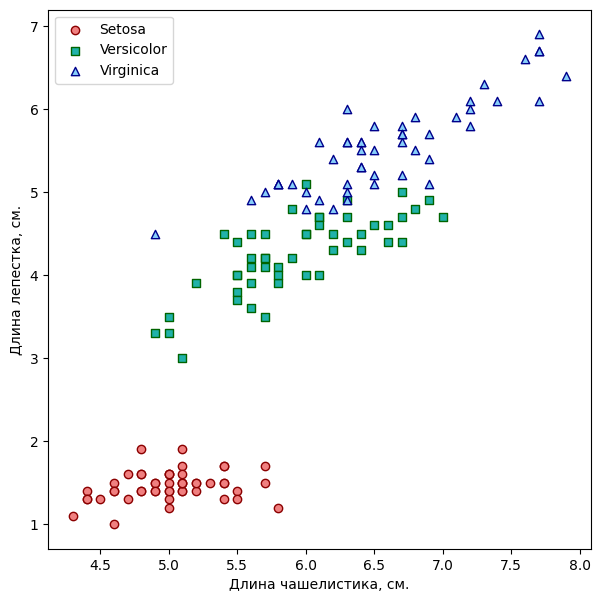

In [59]:
import matplotlib.pyplot as plt

# Определение цветов и маркеров для каждого вида ирисов
iris_styles = {
    "setosa": ("lightcoral", "darkred", "o"),
    "versicolor": ("lightseagreen", "darkgreen", "s"),
    "virginica": ("lightskyblue", "darkblue", "^")
}

# Создаем объект графика и устанавливаем размеры
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

# Рассеяние точек для каждого вида ирисов
for species, (facecolor, edgecolor, marker) in iris_styles.items():
    subset = iris[iris.species == species]
    ax.scatter(subset['sepal length (cm)'], subset['petal length (cm)'], label=species.capitalize(), facecolor=facecolor, edgecolor=edgecolor, marker=marker)

# Задаем подписи для осей
ax.set_xlabel("Длина чашелистика, см.")
ax.set_ylabel("Длина лепестка, см.")

# Добавляем легенду
ax.legend()

# Отображение графика
plt.show()

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загружаем набор данных Iris
iris = load_iris()

# Выбираем только два признака: sepal length (cm) и petal length (cm)
x = iris.data[:, [0, 2]]
y = iris.target

# Разделяем данные на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Создаем классификатор DecisionTreeClassifier с ограничением глубины дерева на 2
clf = DecisionTreeClassifier(max_depth=2)

# Обучаем модель на тренировочных данных
clf.fit(x_train, y_train)

# Предсказываем классы для тестовых данных
y_pred = clf.predict(x_test)

# Вычисляем точность классификации и округляем до трех знаков после запятой
accuracy = round(accuracy_score(y_test, y_pred), 3)

# Выводим точность классификации
print("Точность классификации:", accuracy)

Точность классификации: 0.967


## Задание 4

Построй [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка".
Также отрисуй дерево, которое получилось в результате обучения модели.
Напиши сколько листов у получившегося дерева.

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Eq3G7qhquulWymhiYol0YBB80Lvxjl_B
To: /content/surface.py
100% 1.58k/1.58k [00:00<00:00, 5.68MB/s]


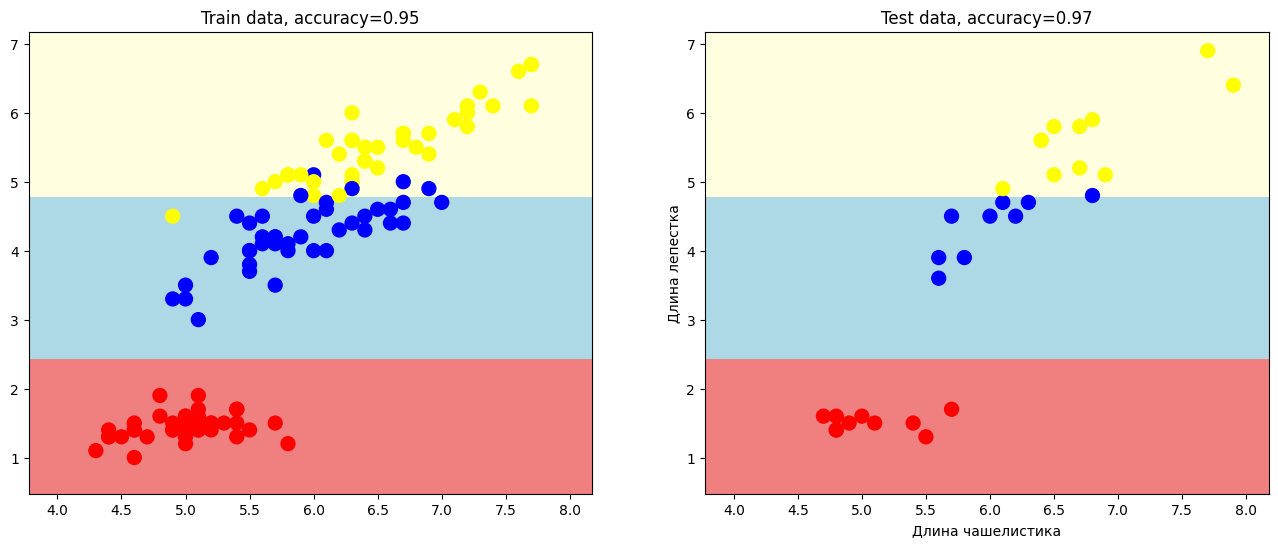

In [61]:
# Загружаем файл surface.py с помощью утилиты gdown по его идентификатору
!gdown --id 1Eq3G7qhquulWymhiYol0YBB80Lvxjl_B

# Импортируем все функции из загруженного файла surface.py
from surface import *

# Получаем сетку для визуализации разделяющей поверхности, используя данные x
get_meshgrid(x)

# Визуализируем разделяющую поверхность с помощью функции plot_decision_surface
# передаем обученный классификатор clf и данные x_train, y_train, x_test, y_test
plot_decision_surface(clf, x_train, y_train, x_test, y_test)

# Добавляем подпись для оси X
plt.xlabel("Длина чашелистика")

# Добавляем подпись для оси Y
plt.ylabel("Длина лепестка")

# Отображаем график с разделяющей поверхностью
plt.show()


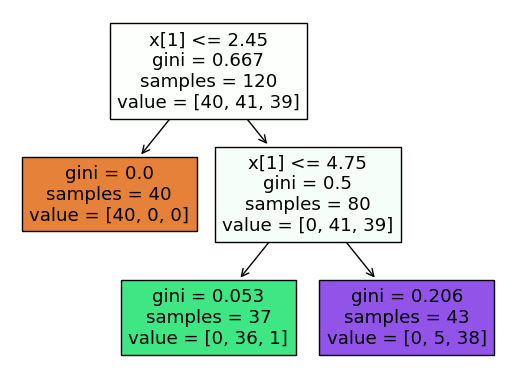

У получившегося дерева 3 листа


In [62]:
import sklearn.tree as tree
import matplotlib.pyplot as plt

# Визуализируем решающее дерево с заполнением узлов цветом
tree.plot_tree(clf, filled=True)

# Отображаем график
plt.show()

# Получаем количество листьев в получившемся дереве
num_leaves = clf.get_n_leaves()

# Выводим информацию о количестве листьев
print(f"У получившегося дерева {num_leaves} листа")


## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 1000 отсчетов.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1.
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-L0AYR-Q9KjhsDIJT8mWOWd-2Q8z0LFc
To: /content/dataset.py
100% 263/263 [00:00<00:00, 728kB/s]


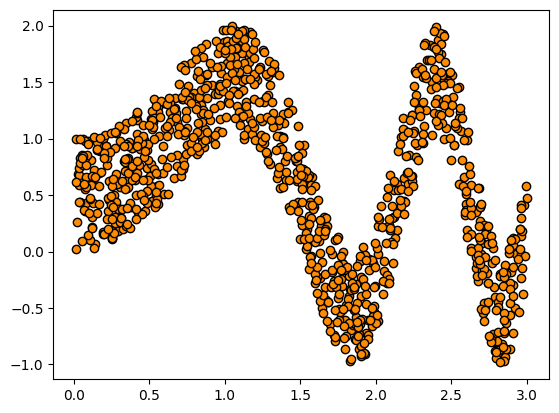

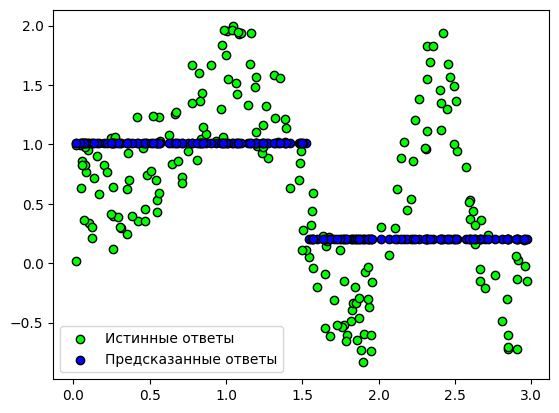

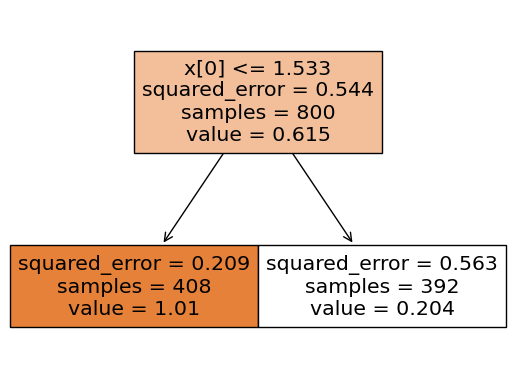

In [63]:
from sklearn.tree import DecisionTreeRegressor
from dataset import generate_sin
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.tree as tree

# Загружаем файл dataset.py для генерации данных
!gdown --id 1-L0AYR-Q9KjhsDIJT8mWOWd-2Q8z0LFc

# Генерируем данные синусоиды
x, y = generate_sin(1000)

# Визуализируем сгенерированные данные
plt.figure()
plt.scatter(x, y, edgecolor="black", c="darkorange")

# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Создаем DecisionTreeRegressor с заданными параметрами
sinus = DecisionTreeRegressor(max_depth=1)

# Обучаем модель на тренировочных данных
sinus = sinus.fit(x_train, y_train)

# Предсказываем значения на тестовых данных
y_pred = sinus.predict(x_test)

# Визуализируем истинные и предсказанные значения
plt.figure()
plt.scatter(x_test, y_test, edgecolor="black", c="lime", label="Истинные ответы")
plt.scatter(x_test, y_pred, edgecolor="black", c="blue", label="Предсказанные ответы")
plt.legend()
plt.show()

# Визуализируем решающее дерево с заполнением узлов цветом
tree.plot_tree(sinus, filled=True)
plt.show()




## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее.

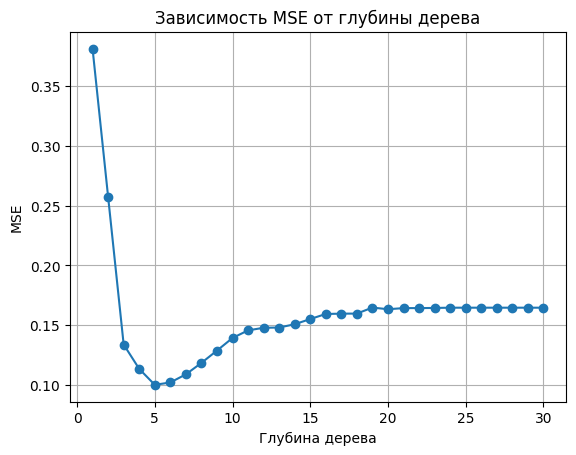

Глубина дерева, на которой MSE на тестовой выборке наилучший: 5


In [64]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Задаем различные значения глубины дерева
max_depths = np.arange(1, 31)

# Список для сохранения значений MSE
mse_list = []

# Обучаем дерево решений для каждого значения глубины дерева и вычисляем MSE
for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Визуализируем зависимость MSE от глубины дерева
plt.figure()
plt.plot(max_depths, mse_list, marker='o', linestyle='-')
plt.xlabel("Глубина дерева")
plt.ylabel("MSE")
plt.title("Зависимость MSE от глубины дерева")
plt.grid(True)
plt.show()

# Находим индекс минимального значения MSE
min_mse_index = mse_list.index(min(mse_list))

# Вычисляем наилучшую глубину дерева
best_depth = min_mse_index + 1  # добавляем 1, т.к. индексы в Python начинаются с 0

print("Глубина дерева, на которой MSE на тестовой выборке наилучший:", best_depth)



## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50).
Напиши количество деревьев, при котором качество модели наилучшее.

Метод bootstrap - это статистический метод для оценки параметров и доверительных интервалов путем многократного выбора выборки с возвращением из исходной выборки. Он часто используется в ансамблевых методах машинного обучения, таких как Bagging.


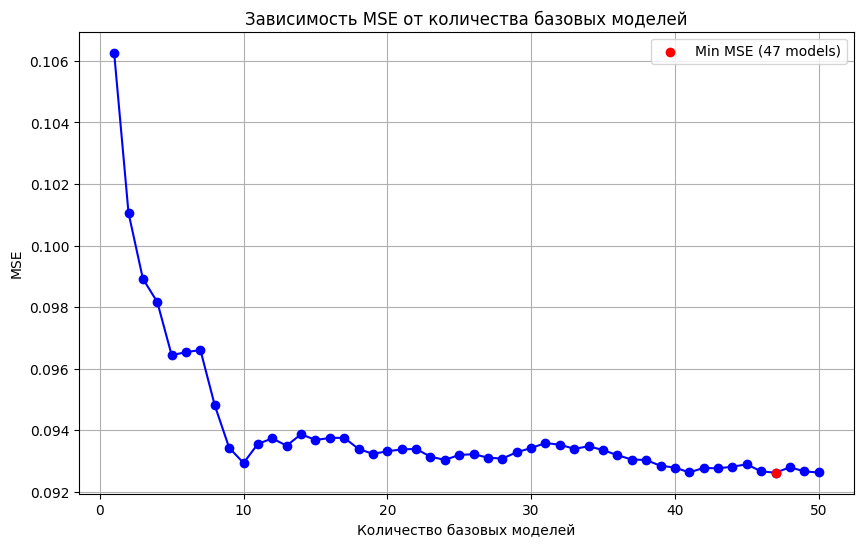

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 47


In [65]:
from sklearn.ensemble import BaggingRegressor
import warnings

# Игнорируем предупреждения
warnings.filterwarnings("ignore")

max_models = 50  # Максимальное количество базовых моделей
max_depth = 5    # Глубина деревьев решений

# Инициализация списка для MSE
mse_list = []

for n in range(1, max_models + 1):
    # Создаем BaggingRegressor с заданными параметрами
    bagging = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=max_depth),
        n_estimators=n,
        bootstrap=True,
        random_state=42
    )

    # Обучаем модель на тренировочных данных
    bagging.fit(x_train, y_train)

    # Предсказываем на тестовых данных
    y_pred = bagging.predict(x_test)

    # Рассчитываем MSE и добавляем в список
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Вычисляем количество деревьев с наилучшим качеством
best_num_models = mse_list.index(min(mse_list)) + 1

# Построение графика MSE от количества базовых моделей
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_models + 1), mse_list, marker='o', linestyle='-', color='b')
plt.scatter(best_num_models, min(mse_list), color='r', label=f'Min MSE ({best_num_models} models)', zorder=5)
plt.xlabel("Количество базовых моделей")
plt.ylabel("MSE")
plt.title("Зависимость MSE от количества базовых моделей")
plt.grid(True)
plt.legend()
plt.show()

# Вывод информации о наилучшем числе моделей
print(f"Количество деревьев решений, при котором MSE на тестовой выборке наилучший: {best_num_models}")



## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5,
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

Случайный лес (Random Forest) - это ансамблевый метод машинного обучения, который комбинирует несколько деревьев решений для получения более точных предсказаний. Каждое дерево строится на основе случайной подвыборки данных, и при принятии решений используется случайное подмножество признаков.


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Задаем параметры модели случайного леса
max_depth = 5             # Максимальная глубина деревьев
n_estimators = 100        # Количество деревьев в лесу
max_features = 'sqrt'     # Количество признаков для сплитов (sqrt - квадратный корень от общего числа признаков)
random_state = 42         # Зафиксированный случайный seed для воспроизводимости результатов

# Создаем модель случайного леса с заданными параметрами
rf = RandomForestRegressor(
    max_depth=max_depth,
    n_estimators=n_estimators,
    max_features=max_features,
    random_state=random_state
)

# Обучаем модель на тренировочных данных
rf.fit(x_train, y_train)

# Предсказываем на тестовых данных
y_pred = rf.predict(x_test)

# Рассчитываем MSE (Mean Squared Error) - среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Округляем MSE до 3 знаков после запятой
mse_rounded = round(mse, 3)

# Выводим значение MSE на тестовой выборке
print("MSE на тестовой выборке:", mse_rounded)

MSE на тестовой выборке: 0.091
